## House Pricing Assignment

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


In [1]:
# Steps:
# 1. Reading and Understanding the Data
# 2. Performing EDA and few visualizations
# 3. Data Preparation  
# 4. Building the model(test,train)
# 5. Making predictions with the final model
# 6. Model Evaluation

In [2]:
#Import Libraries
import pandas as pd #dataframe
import numpy as np #numerical python
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting
# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [3]:
#Loading the data
train_data = pd.read_csv('train.csv')

In [4]:
# Printing the data(first 5 rows)
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.shape

(1460, 81)

In [6]:
#Get the Basic information about the data
## Number of rows and columns
print('Number of Columns:',train_data.shape[1])
print('Number of Rows:',train_data.shape[0])
## Number of missing values
print('Number of missing values:',train_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',train_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',train_data.duplicated().sum())

Number of Columns: 81
Number of Rows: 1460
Number of missing values: 7829
Number of unique values: 9751
Number of duplicates: 0


In [7]:
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
print(train_data.isnull().sum().sum())

7829


In [9]:
# Let's drop the Id column since it's not important for both EDA and model building 
train_data.drop(columns=['Id'], inplace=True, errors='ignore')

In [10]:
#let's first seperate the categorial and numerical data so that we can observe different visualizations depending on that.
# Selecting categorical columns
cat_columns = train_data.select_dtypes(include=['object']).columns
cat_data = train_data[cat_columns]

# Selecting numerical columns
num_data = train_data.select_dtypes(exclude=['object'])

# Display the first few rows of each dataset
print("Categorical Data:")
print(cat_data.head())

print("\nNumerical Data:")
print(num_data.head())

Categorical Data:
  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFe

## Step 2: Performing EDA and few visualizations
#### Not Mandatory just for a better understading of the variences between the varaiables.

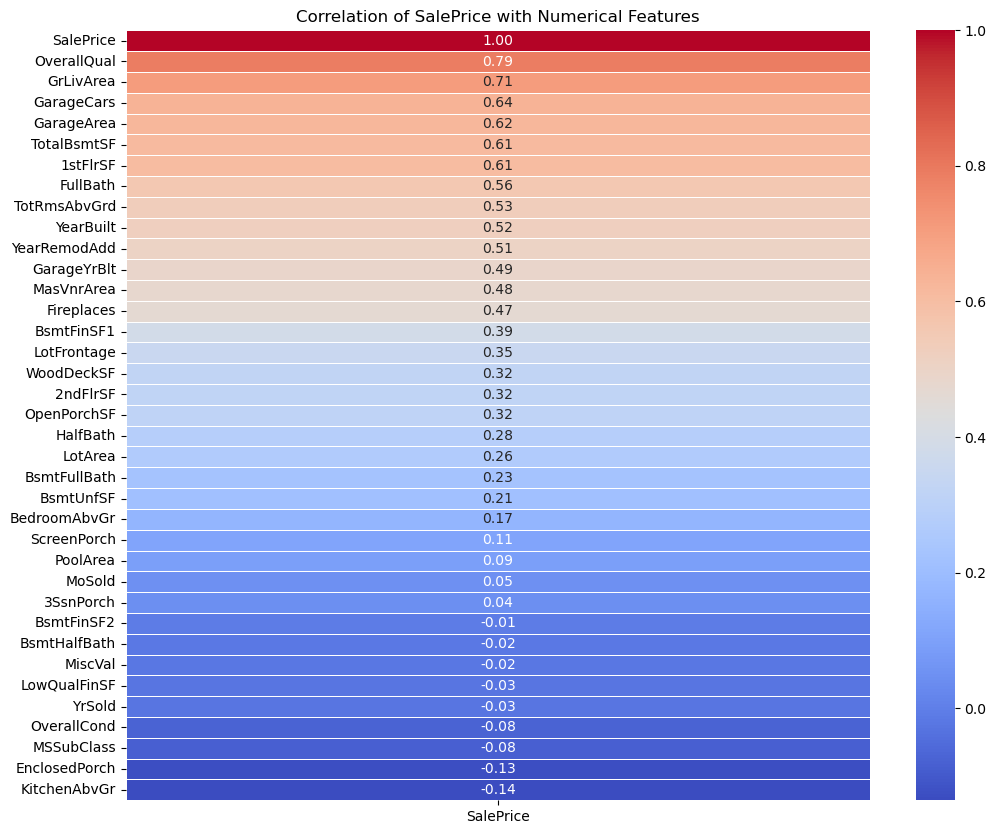

In [11]:
# Step 2: Performing EDA 
#### Not Mandatory just for a better understading of the variences between the varaiables.
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_saleprice = num_data.corr()['SalePrice'].sort_values(ascending=False)

# Plot the heatmap for correlations with SalePrice
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_saleprice.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of SalePrice with Numerical Features')
plt.show()


As we can see, the heatmap explains the correlation with variables. The highest correlation is with 'OverallQuall', and there are a few more variables that exhibit dependency. Let's visualize and understand the relation.

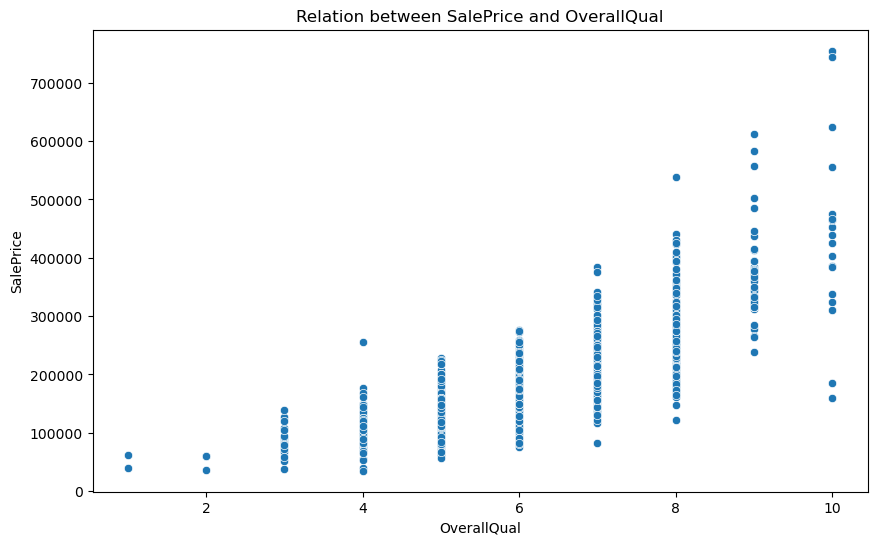

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between SalePrice and OverallQual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Relation between SalePrice and OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()



The scatter plot shows a positive correlation between sales price and overall quality. This means that as the overall quality increases, the sales price also increases.
One thing we can understad is in house pricing that the "qualitiy" plays a vital role as we can see for all the quality variabels as the price increases the qualidty is also increasing. 

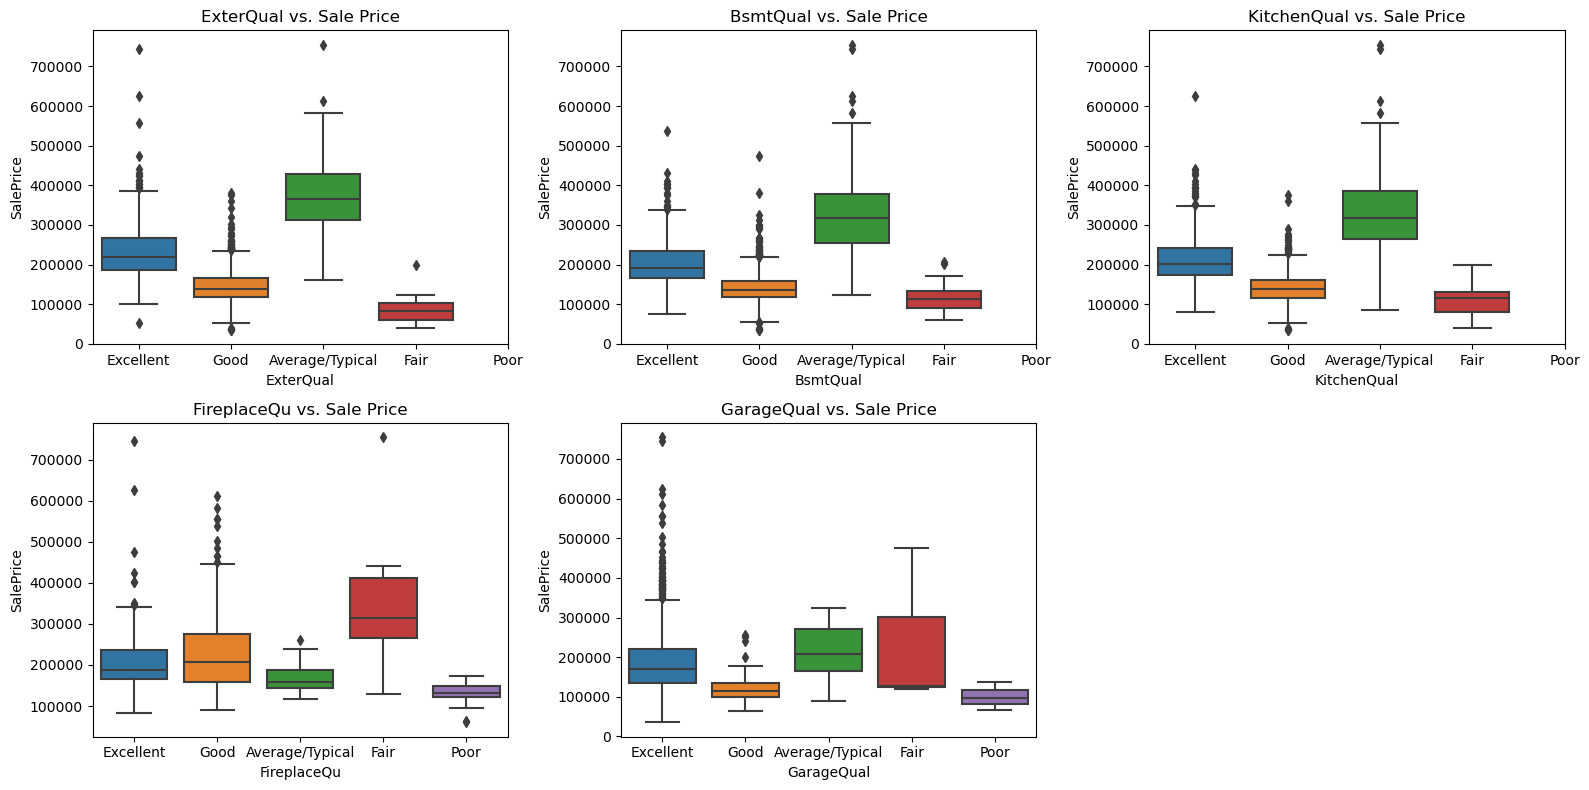

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom labels
quality_labels = {'Ex': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical', 'Fa': 'Fair', 'Po': 'Poor'}

# Define the quality variables to plot
quality_vars = ['ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'GarageQual']

# Create subplots for each quality variable
plt.figure(figsize=(16, 8))
for i, var in enumerate(quality_vars, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=var, y='SalePrice', data=train_data)
    plt.title(f'{var} vs. Sale Price')
    plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[quality_labels[label] for label in ['Ex', 'Gd', 'TA', 'Fa', 'Po']])
    plt.tight_layout()

plt.show()


By this plot we cann see how various quality measures differ by the changein the House price.

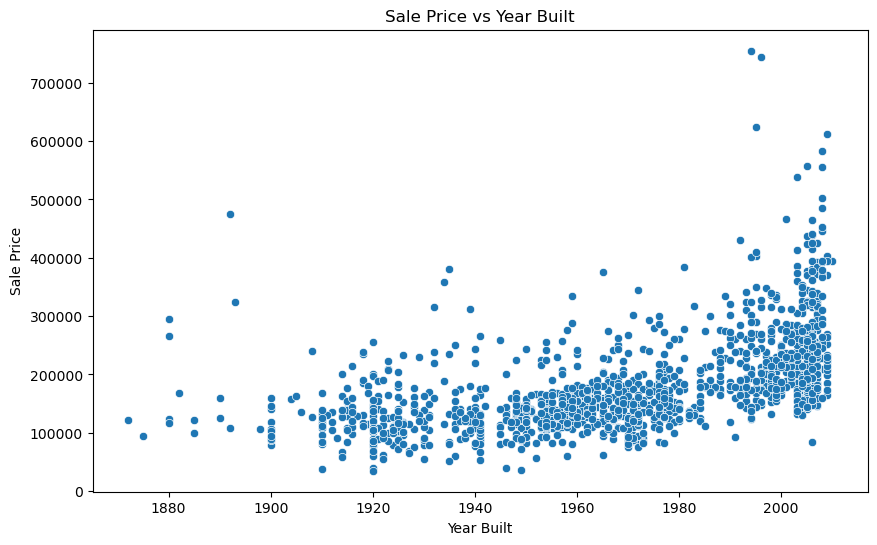

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between YearBuilt and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()


By looking at the general trend of the data points in the scatter plot, we can see a positive correlation between the year a house was built and its sale price. This means that newer houses end to sell for higher prices than older houses.

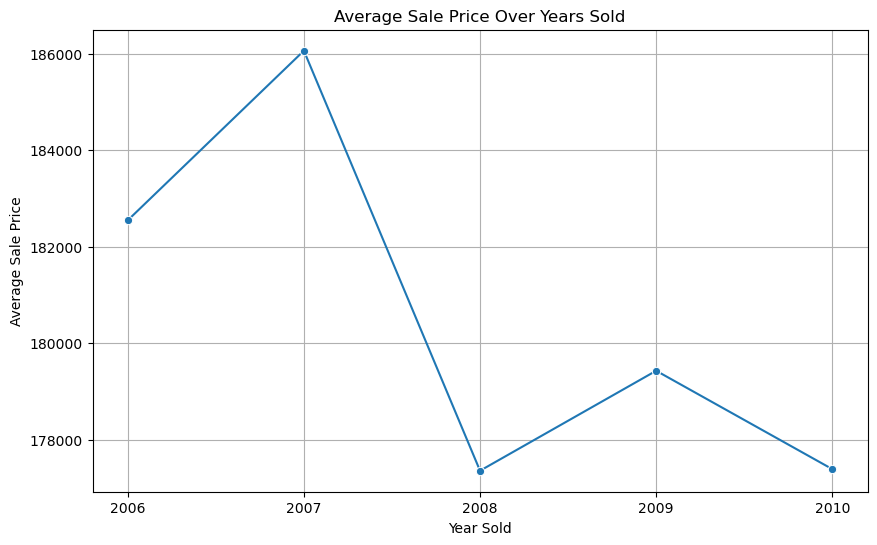

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average sale price for each year sold
avg_sale_price_by_year = train_data.groupby('YrSold')['SalePrice'].mean().reset_index()

# Line plot for average sale price over years sold
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_sale_price_by_year, x='YrSold', y='SalePrice', marker='o')
plt.title('Average Sale Price Over Years Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.xticks(avg_sale_price_by_year['YrSold'])
plt.grid(True)
plt.show()


So, we can see an increase from the start in the graph, but from 2007, the house prices in Australia did go down between 2007 and 2008. This decline I think was part of a global phenomenon known as the Global Financial Crisis (GFC) {NOT SURE}. 

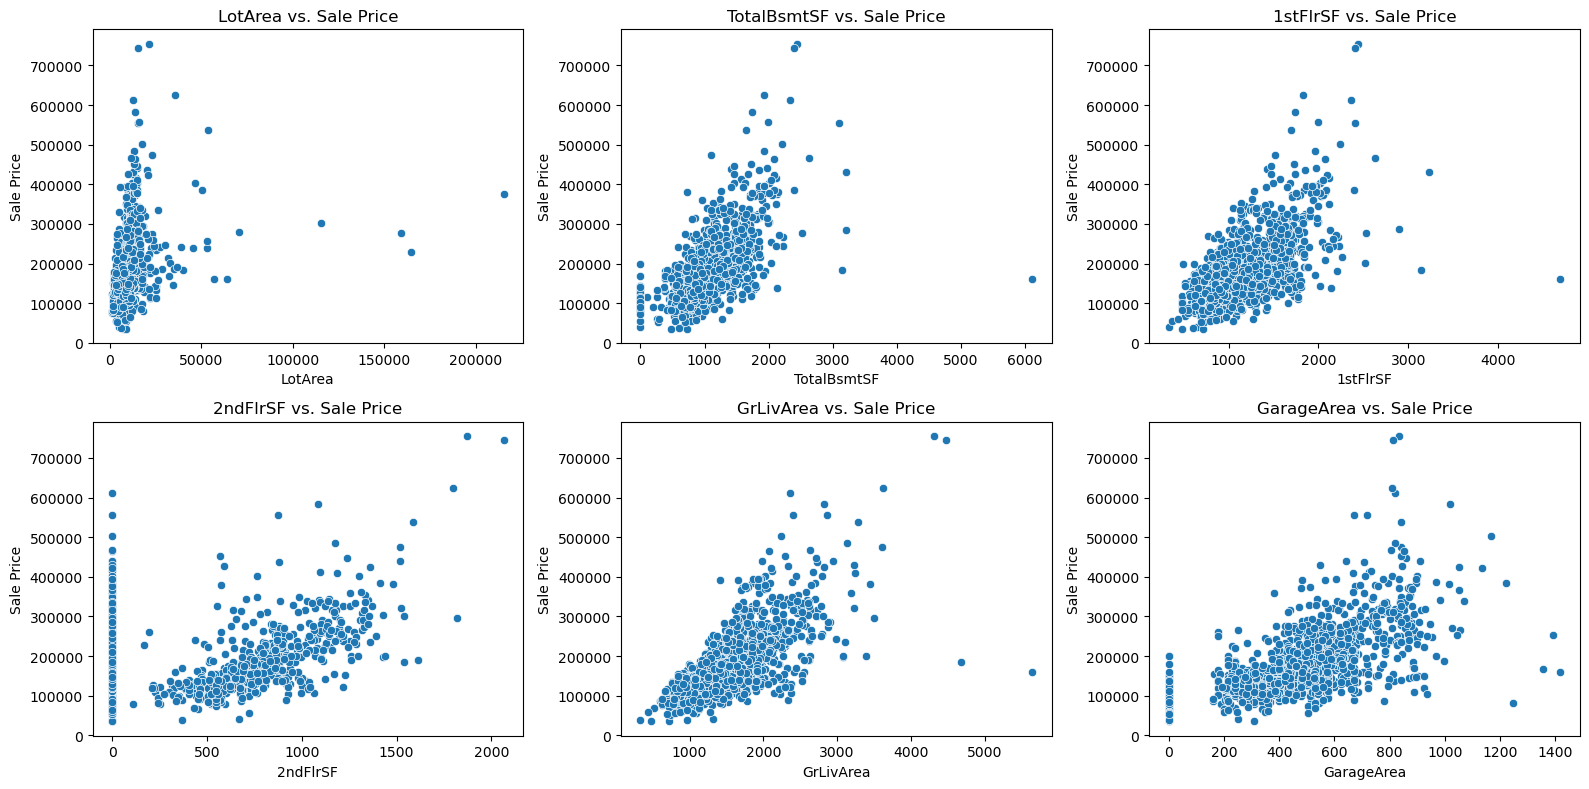

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the square footage variables
square_feet_vars = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea']

# Create subplots for each square footage variable
plt.figure(figsize=(16, 8))
for i, var in enumerate(square_feet_vars, start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=var, y='SalePrice', data=train_data)
    plt.title(f'{var} vs. Sale Price')
    plt.xlabel(var)
    plt.ylabel('Sale Price')
    plt.tight_layout()

plt.show()


By looking at all the graphs together, we can see that there are some trends. Perhaps all the features related to size (lot area, basement, square footage) show a positive correlation, suggesting that bigger houses tend to sell for more.

## Step3: Data Preparation
#### So here we will do all the data preprocessing steps required to build the model 

Encode the categorical variables using ordinal encoding, where each category is mapped to a numerical value based on its order (e.g., Excellent = 5, Good = 4, Average/Typical = 3, Fair = 2, Poor = 1).

In [17]:
# Define the mapping
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

# List of columns to map
columns_to_map = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'PoolQC', 'GarageQual', 'GarageCond','FireplaceQu','KitchenQual','HeatingQC']

# Apply mapping to each column
for col in columns_to_map:
    train_data[col] = train_data[col].map(mapping)



Same encoding here also ('GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0)

In [18]:
# Define the mapping for ordinal encoding
mapping_fence = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}

# Apply ordinal encoding to the "Fence" column
train_data['Fence'] = train_data['Fence'].map(mapping_fence)

In [19]:
#Encode ordinal categorical variable using custom mapping
mapping_exposure = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1} 
train_data['BsmtExposure'] = train_data['BsmtExposure'].map(mapping_exposure)

In [20]:
ordinal_mapping = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
# Apply the ordinal encoding
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map(ordinal_mapping)
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].map(ordinal_mapping)

Using **Label Encoding** so that more number of column creation ca be avoided(dummies).

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'CentralAir' column
train_data['CentralAir'] = le.fit_transform(train_data['CentralAir'])

In [22]:
columns_to_convert = [
    'MSSubClass', 'OverallQual', 'OverallCond', 'ExterCond','KitchenQual','FireplaceQu','PoolQC','BsmtFinType2',
    'ExterQual','CentralAir', 'BsmtQual', 'BsmtCond', 'BsmtExposure','GarageCond','GarageQual','HeatingQC','BsmtFinType1','Fence'
]

for col in columns_to_convert:
    train_data[col] = train_data[col].fillna(0)
    
# Convert each column to 'object' type using a loop
for column in columns_to_convert:
    train_data[column] = train_data[column].astype('int')


Here are the few more things to be done <br>
Combine Square Footage Columns:<br>
You can combine the square footage columns (1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea) into a single total square footage column.<br>
This combined feature can represent the total living area of the house, which might be more informative than individual floor areas.<br>
Combine Bathroom Columns:<br>
Similarly, you can combine the bathroom columns (BsmtFullBath, BsmtHalfBath, FullBath, HalfBath) into a total bathroom count column.<br>
This combined feature can represent the total number of bathrooms in the house, which could be a significant factor in housing prices.<br>
Total Room Count:<br>
You can calculate the total room count by summing up the number of bedrooms (Bedroom) and kitchens (Kitchen) above grade.<br>
This feature can provide an overall indication of the size of the house in terms of rooms available.<br>


In [23]:
import pandas as pd

# Combine square footage columns
train_data['TotalSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['LowQualFinSF'] + train_data['GrLivArea']

# Combine bathroom columns
train_data['TotalBath'] = train_data['BsmtFullBath'] + 0.5 * train_data['BsmtHalfBath'] + train_data['FullBath'] + 0.5 * train_data['HalfBath']

# Calculate total room count
train_data['TotalRooms'] = train_data['BedroomAbvGr'] + train_data['KitchenAbvGr']

# Drop the original columns
train_data.drop(columns=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'], inplace=True)



In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int32  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int32  
 17  OverallCond    1460 non-null   int32  
 18  YearBuil

In [25]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalBath,TotalRooms
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.00000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,3.39589,3.083562,...,2.758904,0.017808,0.565753,43.489041,6.321918,2007.815753,180921.195890,3030.927397,2.210616,3.913014
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,0.57428,0.351054,...,40.177307,0.268952,1.204483,496.123024,2.703626,1.328095,79442.502883,1050.960767,0.785399,0.886249
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,668.000000,1.000000,1.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,2259.000000,2.000000,3.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,2928.000000,2.000000,4.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,4.00000,3.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,3553.500000,2.500000,4.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,5.000000,...,738.000000,5.000000,4.000000,15500.000000,12.000000,2010.000000,755000.000000,11284.000000,6.000000,10.000000


So now let's deal with missing values for few columns(numerical) with NAN values we have replaced with 0. But there are still more missing values. Let's see those columns 

In [26]:
# Get columns with missing values
columns_with_missing = train_data.columns[train_data.isnull().any()]

# Create DataFrames for columns with missing values
train_data_missing = train_data[columns_with_missing]

print(train_data_missing.columns)


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'MiscFeature'],
      dtype='object')


In [27]:
total_missing = train_data.isnull().sum().sort_values(ascending=False)
percent_missing = (train_data.isnull().sum() / train_data.isnull().count()).sort_values(ascending=False) * 100
missing_data_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data_summary['Data Types'] = train_data.dtypes
# Print the summary of m issing data
missing_data_summary.head(9)

,Total,Percent,Data Types
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
MasVnrType,872,59.726027,object
LotFrontage,259,17.739726,float64
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object
GarageYrBlt,81,5.547945,float64
MasVnrArea,8,0.547945,float64
Electrical,1,0.068493,object


First, let's plot the top 3 columns and see whether they are important or not, as they have many missing values

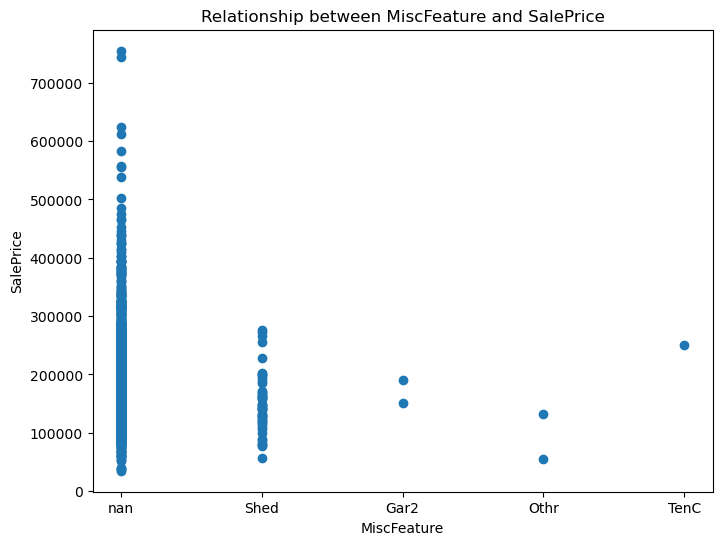

In [28]:
# Convert non-string values in PoolQC to strings
train_data['MiscFeature'] = train_data['MiscFeature'].astype(str)

# Plot the relationship between PoolQC and SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(train_data['MiscFeature'], train_data['SalePrice'])
plt.title('Relationship between MiscFeature and SalePrice')
plt.xlabel('MiscFeature')
plt.ylabel('SalePrice')
plt.show()


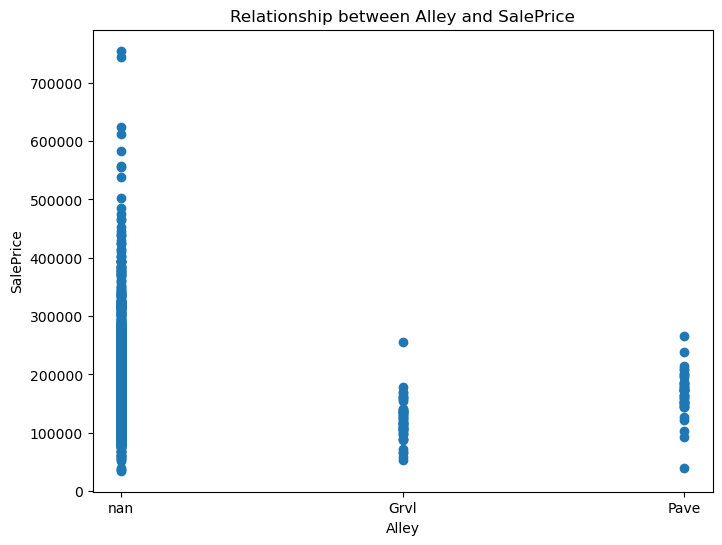

In [29]:
# Convert non-string values in PoolQC to strings
train_data['Alley'] = train_data['Alley'].astype(str)

# Plot the relationship between PoolQC and SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Alley'], train_data['SalePrice'])
plt.title('Relationship between Alley and SalePrice')
plt.xlabel('Alley')
plt.ylabel('SalePrice')
plt.show()


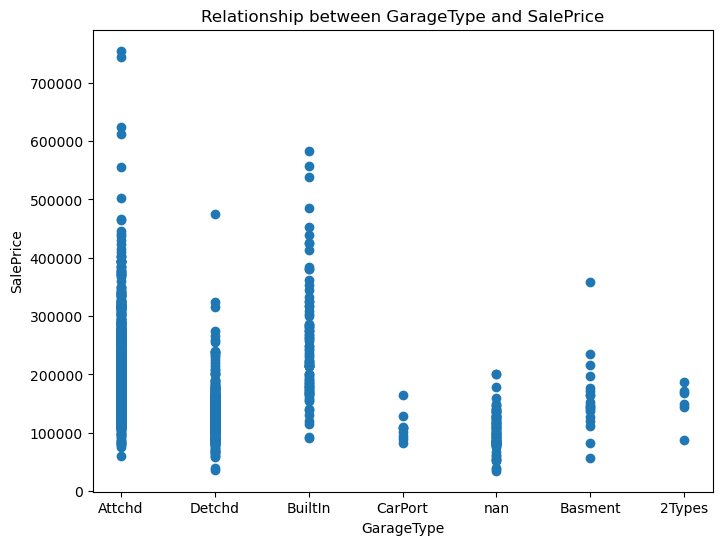

In [30]:
# Convert non-string values in PoolQC to strings
train_data['GarageType'] = train_data['GarageType'].astype(str)

# Plot the relationship between PoolQC and SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(train_data['GarageType'], train_data['SalePrice'])
plt.title('Relationship between GarageType and SalePrice')
plt.xlabel('GarageType')
plt.ylabel('SalePrice')
plt.show()


As we can see, these plots show us that these columns have data that can be useful in predicting the house price, and as we know, factors like 'alley' are important features in predicting house prices. So, let's replace these NaN values with 'None'. For numerical data, we will use the median, as it helps maintain the central tendency of the data and is less sensitive to outliers.

In [31]:
import pandas as pd

categorical_columns = ['MiscFeature', 'Alley', 'MasVnrType', 'GarageType',
                       'GarageFinish', 'Electrical']

# Replace missing values in categorical columns with "None"
train_data[categorical_columns] = train_data[categorical_columns].fillna('None')

# Fill missing values in numerical columns with median
numerical_columns = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].median())


In [32]:
total_missing = train_data.isnull().sum().sort_values(ascending=False)
percent_missing = (train_data.isnull().sum() / train_data.isnull().count()).sort_values(ascending=False) * 100
missing_data_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data_summary['Data Types'] = train_data.dtypes
# Print the summary of m issing data
missing_data_summary.head(10)

,Total,Percent,Data Types
MSSubClass,0,0.0,int32
TotalBsmtSF,0,0.0,int64
GarageCond,0,0.0,int32
GarageQual,0,0.0,int32
GarageArea,0,0.0,int64
GarageCars,0,0.0,int64
GarageFinish,0,0.0,object
GarageYrBlt,0,0.0,float64
GarageType,0,0.0,object
FireplaceQu,0,0.0,int32


Now, as we can see, all the missing values for all the variables have been replaced successfully.

Now, let's perform Data Type Segregation to divide the data into numerical and categorical data. This will allow us to apply appropriate scaling techniques to each data type.

In [33]:
# Selecting numerical columns
numerical_columns = train_data.select_dtypes(include=['int', 'float']).columns.tolist()

# Selecting categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

# Separate numerical and categorical variables
numerical_data = train_data[numerical_columns]
categorical_data = train_data[categorical_columns]


In [34]:
numerical_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalBath,TotalRooms
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,0,2,2008,208500,3420,3.5,4
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,0,5,2007,181500,2524,2.5,4
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,0,9,2008,223500,3572,3.5,4
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,0,2,2006,140000,3434,2.0,4
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,0,12,2008,250000,4396,3.5,5


Now let's check for skewness in out numerical data as Skewness provides valuable insights into the shape and distribution of data.

In [35]:
import pandas as pd
from scipy.stats import skew
# Calculate skewness for each column
skewness = numerical_data.apply(skew)

print("Skewness for each column:")
print(skewness)


Skewness for each column:
MSSubClass        1.406210
LotFrontage       2.406671
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.674865
ExterQual         0.825140
ExterCond         1.395783
BsmtQual         -1.286247
BsmtCond         -3.697230
BsmtExposure      1.101835
BsmtFinType1     -0.159013
BsmtFinSF1        1.683771
BsmtFinType2      3.293608
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
HeatingQC        -0.539902
CentralAir       -3.526757
KitchenQual       0.386368
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
FireplaceQu       0.112654
GarageYrBlt      -0.677636
GarageCars       -0.342197
GarageArea        0.179796
GarageQual       -3.225265
GarageCond       -3.328476
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
Po

For example let's jsut check the skewness for "MasVnrArea"

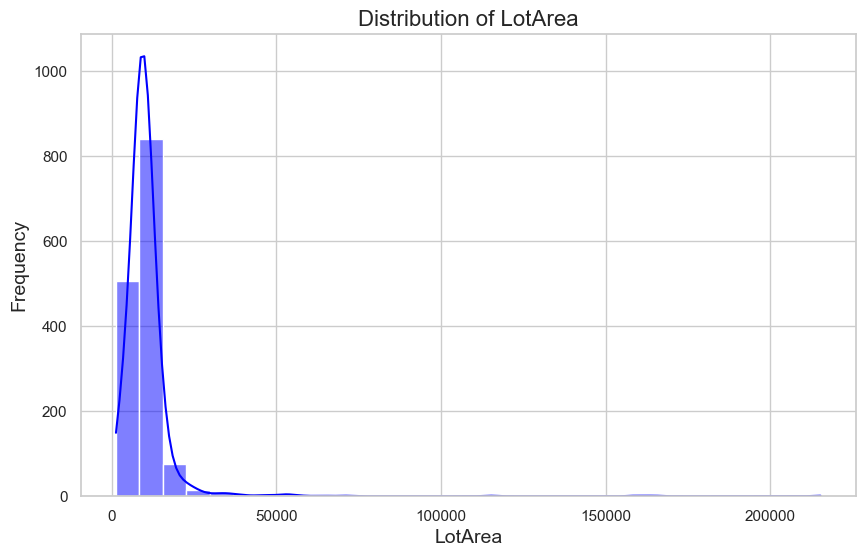

In [36]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram of 'PoolArea'
sns.histplot(numerical_data['LotArea'], kde=True, color='blue', bins=30)

# Add labels and title
ax.set_xlabel('LotArea', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of LotArea', fontsize=16)

# Show the plot
plt.show()

In [37]:
# Get columns with skewness higher than 4
high_skew_cols = numerical_data.columns[numerical_data.skew() > 1]

# Apply log transformation to columns with skewness higher than 4
for col in high_skew_cols:
    numerical_data[col] = np.log1p(numerical_data[col])

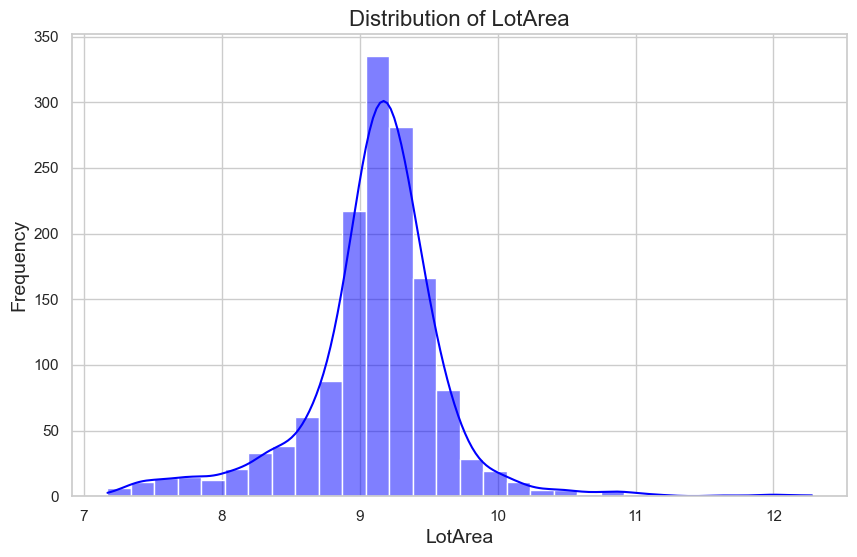

In [38]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram of 'PoolArea'
sns.histplot(numerical_data['LotArea'], kde=True, color='blue', bins=30)

# Add labels and title
ax.set_xlabel('LotArea', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of LotArea', fontsize=16)

# Show the plot
plt.show()

Now, by addressing skewness appropriately, we have ensured that our data is better suited for modeling and improved the performance of the models.

In [39]:
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition
0,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,nan,WD,Normal
1,RL,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,CBlock,GasA,SBrkr,Typ,Attchd,RFn,Y,nan,WD,Normal
2,RL,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,nan,WD,Normal
3,RL,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,BrkTil,GasA,SBrkr,Typ,Detchd,Unf,Y,nan,WD,Abnorml
4,RL,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,nan,WD,Normal


Now, let's perform Min-Max scaling on all the numerical data so that we can proceed with model building.

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling (Normalization)
scaler_minmax = MinMaxScaler()
scaled_numerical_data_minmax = scaler_minmax.fit_transform(numerical_data)
scaled_numerical_data_minmax_df = pd.DataFrame(scaled_numerical_data_minmax, columns=numerical_data.columns)
# The scaled_numerical_data_minmax is now a numpy array with scaled values

Now, let's perform label encoding on all the categorical data so that we can proceed with model building.

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()
# Assuming `categorical_data` is your DataFrame containing categorical columns
categorical_data = categorical_data.astype(str)

# Apply label encoding to each column in the DataFrame
encoded_categorical_data_df = categorical_data.apply(encoder.fit_transform)

In [42]:
scaled_numerical_data_minmax_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalBath,TotalRooms
0,0.483003,0.413268,0.366271,0.666667,0.500,0.949275,0.883333,0.716038,0.666667,0.63093,...,0.0,0.0,0.0,0.0,0.090909,0.50,0.581428,0.577574,0.5,0.333333
1,0.000000,0.490307,0.391245,0.555556,0.875,0.753623,0.433333,0.000000,0.333333,0.63093,...,0.0,0.0,0.0,0.0,0.363636,0.25,0.536316,0.470089,0.3,0.333333
2,0.483003,0.429990,0.422289,0.666667,0.500,0.934783,0.866667,0.690361,0.666667,0.63093,...,0.0,0.0,0.0,0.0,0.727273,0.50,0.604026,0.592960,0.5,0.333333
3,0.551764,0.383633,0.390223,0.666667,0.500,0.311594,0.333333,0.000000,0.333333,0.63093,...,0.0,0.0,0.0,0.0,0.090909,0.00,0.451868,0.579020,0.2,0.333333
4,0.483003,0.508439,0.468694,0.777778,0.500,0.927536,0.833333,0.794318,0.666667,0.63093,...,0.0,0.0,0.0,0.0,1.000000,0.50,0.640475,0.666406,0.5,0.444444


In [43]:
encoded_categorical_data_df.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,...,2,1,5,6,1,2,2,4,8,4
1,3,1,2,3,3,0,2,0,24,1,...,1,1,5,6,1,2,2,4,8,4
2,3,1,2,0,3,0,4,0,5,2,...,2,1,5,6,1,2,2,4,8,4
3,3,1,2,0,3,0,0,0,6,2,...,0,1,5,6,5,3,2,4,8,0
4,3,1,2,0,3,0,2,0,15,2,...,2,1,5,6,1,2,2,4,8,4


In [44]:
# we have combined numerical data and the categorial data into one final dataset
processed_data = pd.concat([scaled_numerical_data_minmax_df, encoded_categorical_data_df], axis=1)

In [45]:
processed_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition
0,0.483003,0.413268,0.366271,0.666667,0.500,0.949275,0.883333,0.716038,0.666667,0.63093,...,2,1,5,6,1,2,2,4,8,4
1,0.000000,0.490307,0.391245,0.555556,0.875,0.753623,0.433333,0.000000,0.333333,0.63093,...,1,1,5,6,1,2,2,4,8,4
2,0.483003,0.429990,0.422289,0.666667,0.500,0.934783,0.866667,0.690361,0.666667,0.63093,...,2,1,5,6,1,2,2,4,8,4
3,0.551764,0.383633,0.390223,0.666667,0.500,0.311594,0.333333,0.000000,0.333333,0.63093,...,0,1,5,6,5,3,2,4,8,0
4,0.483003,0.508439,0.468694,0.777778,0.500,0.927536,0.833333,0.794318,0.666667,0.63093,...,2,1,5,6,1,2,2,4,8,4


This is our **final dataset** prepared for model building 

In [46]:
processed_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.350706,0.422596,0.379763,0.566591,0.571918,0.719332,0.581096,0.287362,0.465297,0.646545,...,1.396575,1.036301,4.595890,5.749315,2.485616,1.876712,1.856164,3.922603,7.513014,3.770548
std,0.311789,0.118267,0.101273,0.153666,0.139100,0.218862,0.344090,0.356278,0.191427,0.075850,...,0.722394,0.295124,1.328647,0.979659,1.933206,1.191646,0.496592,0.404103,1.552100,1.100854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.383633,0.344320,0.444444,0.500000,0.594203,0.283333,0.000000,0.333333,0.630930,...,1.000000,1.000000,5.000000,6.000000,1.000000,1.000000,2.000000,4.000000,8.000000,4.000000
50%,0.401904,0.435403,0.388752,0.555556,0.500000,0.731884,0.733333,0.000000,0.333333,0.630930,...,1.000000,1.000000,5.000000,6.000000,1.000000,2.000000,2.000000,4.000000,8.000000,4.000000
75%,0.551764,0.485634,0.428310,0.666667,0.625000,0.927536,0.900000,0.692219,0.666667,0.630930,...,2.000000,1.000000,5.000000,6.000000,5.000000,3.000000,2.000000,4.000000,8.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,6.000000,6.000000,3.000000,2.000000,4.000000,8.000000,5.000000


## Step 4: Building the model (test,train) and  Evaluation

In [47]:
# separating the target variable from the rest of the data and also defining X
y = processed_data['SalePrice']
processed_data.drop(columns=['SalePrice'], inplace=True, errors='ignore')
X = processed_data

Also the requirement for RFE is not neccessarily required as we are using lasso regression which will eventually eliminate most of the features. Also the objective is to finding the optimal lamda value and performing regurilzation techniques.

Calculating VIF to understand the relations.

In [48]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'X' is your DataFrame containing predictor variables

# Add a constant column to the DataFrame (required for statsmodels)
X_with_const = add_constant(X)

# Calculate VIF for each predictor variable
vif_values = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame({'Variable': X_with_const.columns, 'VIF': vif_values})

# Filter variables with VIF > 10
high_vif_variables = vif_data[vif_data['VIF'] > 10]

# Display the variables with VIF > 10
print(high_vif_variables)


       Variable          VIF
0         const  2214.719366
29   GarageQual    14.009632
30   GarageCond    14.586631
36     PoolArea    33.416182
37       PoolQC    33.418733
39      MiscVal    13.807166
70  MiscFeature    13.720359


Since these features play a vital role in predicting house prices, and as we will be using regularization techniques like Ridge or Lasso regression, which can effectively deal with multicollinearity by penalizing the coefficients of correlated variables, these techniques can help mitigate the impact of multicollinearity while still retaining the important variables

In [49]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's try to build the first model with the specific parameters

In [50]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Initialize Ridge regression model
ridge_model_m1 = Ridge(alpha=10) 

# Train Ridge model on the features
ridge_model_m1.fit(X_train, y_train)

# Initialize Lasso regression model
lasso_model_m1 = Lasso(alpha=0.1)  

# Train Lasso model features
lasso_model_m1.fit(X_train, y_train)

# Use the Ridge model to make predictions on the train data
ridge_predictions_train_m1 = ridge_model_m1.predict(X_train)

# Use the Lasso model to make predictions on the train data
lasso_predictions_train_m1 = lasso_model_m1.predict(X_train)

# Calculate mean squared error for ridge predictions
ridge_mse_m1 = mean_squared_error(y_train, ridge_predictions_train_m1)


# Calculate mean squared error for Lasso predictions
lasso_mse_m1 = mean_squared_error(y_train, lasso_predictions_train_m1)


print("Ridge MSE:", ridge_mse_m1)
print("Lasso MSE:", lasso_mse_m1)



Ridge MSE: 0.001973362643568362
Lasso MSE: 0.014584812146591367


In [51]:
# Calculate R-squared score for Ridge model
ridge_r2_m1 = r2_score(y_train, ridge_predictions_train_m1)

# Calculate number of predictors in Ridge model
num_predictors_ridge_m1 = X_train.shape[1]

# Calculate adjusted R-squared for Ridge model
ridge_adj_r2_m1 = 1 - (1 - ridge_r2_m1) * (len(y_train) - 1) / (len(y_train) - num_predictors_ridge_m1 - 1)

# Calculate R-squared score for Lasso model
lasso_r2_m1 = r2_score(y_train, lasso_predictions_train_m1)

# Calculate nuAmber of predictors in Lasso model
num_predictors_lasso_m1 = X_train.shape[1]

# Calculate adjusted R-squared for Lasso model
lasso_adj_r2_m1 = 1 - (1 - lasso_r2_m1) * (len(y_train) - 1) / (len(y_train) - num_predictors_lasso_m1 - 1)

print("Ridge R-squared score:", ridge_r2_m1)
print("Ridge Adjusted R-squared score:", ridge_adj_r2_m1)
print("Lasso R-squared score:", lasso_r2_m1)
print("Lasso Adjusted R-squared score:", lasso_adj_r2_m1)


Ridge R-squared score: 0.8776606199995851
Ridge Adjusted R-squared score: 0.8696163867940784
Lasso R-squared score: 0.09580893240685495
Lasso Adjusted R-squared score: 0.036355273167853586


So, as we can see the Lamda value for Ridge seems good but for lasso is not valid and has not able to provide the expected results.

##### Here, let's use Grid search because it allows us to systematically explore different values of lambda to find the optimal regularization strength, ensuring that the lambda value optimizes model performance and prevents overfitting. Which we can use in our second model.

##### I am first trying to find the optimal value for Ridge Regression, and then I will find the optimal value for Lasso regression.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define alpha values to search over
alphas = [0.001, 0.01, 0.1, 1, 10, 50]

# Create parameter grid
param_grid = {'alpha': alphas}

# Initialize Ridge model
ridge_model = Ridge()

# Perform grid search
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_lamda_Ridge = grid_search.best_params_['alpha']

print("Best lamda for Ridge:", best_lamda_Ridge)


Best lamda for Ridge: 1


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define alpha values to search over
alphas = [0.001, 0.01, 0.1, 1, 10, 50]

# Create parameter grid
param_grid = {'alpha': alphas}

# Initialize Lasso model
lasso_model = Lasso()

# Perform grid search
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_lamda_Lasso = grid_search.best_params_['alpha']

print("Best lamda for Lasso:", best_lamda_Lasso)


Best lamda for Lasso: 0.001


Having determined the optimal values for Ridge and Lasso regression, we are ready to utilize them to train our second machine learning model and evaluate its performance

In [54]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Initialize Ridge regression model
ridge_model = Ridge(alpha=best_lamda_Ridge) 

# Train Ridge model on the features
ridge_model.fit(X_train, y_train)

# Initialize Lasso regression model
lasso_model = Lasso(alpha=best_lamda_Lasso)  

# Train Lasso model features
lasso_model.fit(X_train, y_train)

# Use the Ridge model to make predictions on the train data
ridge_predictions_train = ridge_model.predict(X_train)

# Use the Lasso model to make predictions on the train data
lasso_predictions_train = lasso_model.predict(X_train)

# Calculate mean squared error for ridge predictions
ridge_mse = mean_squared_error(y_train, ridge_predictions_train)


# Calculate mean squared error for Lasso predictions
lasso_mse = mean_squared_error(y_train, lasso_predictions_train)


print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)



Ridge MSE: 0.0016853894656945897
Lasso MSE: 0.0020887041983066335


First I have initialized Ridge and Lasso regression models, trained them on the training data, and generated predictions. Also calculated the mean squared error (MSE) for both Ridge and Lasso predictions on the training data.<br>
As we can see that the MSR value is low suggesting better perfromance. Let's also examine the coefficients.

In [55]:
# Calculate R-squared score for Ridge model
ridge_r2 = r2_score(y_train, ridge_predictions_train)

# Calculate number of predictors in Ridge model
num_predictors_ridge = X_train.shape[1]

# Calculate adjusted R-squared for Ridge model
ridge_adj_r2 = 1 - (1 - ridge_r2) * (len(y_train) - 1) / (len(y_train) - num_predictors_ridge - 1)

# Calculate R-squared score for Lasso model
lasso_r2 = r2_score(y_train, lasso_predictions_train)

# Calculate nuAmber of predictors in Lasso model
num_predictors_lasso = X_train.shape[1]

# Calculate adjusted R-squared for Lasso model
lasso_adj_r2 = 1 - (1 - lasso_r2) * (len(y_train) - 1) / (len(y_train) - num_predictors_lasso - 1)

print("Ridge R-squared score:", ridge_r2)
print("Ridge Adjusted R-squared score:", ridge_adj_r2)
print("Lasso R-squared score:", lasso_r2)
print("Lasso Adjusted R-squared score:", lasso_adj_r2)


Ridge R-squared score: 0.8955136284938173
Ridge Adjusted R-squared score: 0.8886432917372464
Lasso R-squared score: 0.8705099757219332
Lasso Adjusted R-squared score: 0.8619955631666631


These are the R-Squared values and adjusted r squared value for both regression models, indicating that the models are performing well. However, let's also assess their performance on the test data.

In [56]:
# Get coefficients
ridge_coefficients = ridge_model.coef_

# Get coefficients
lasso_coefficients = lasso_model.coef_

# Display coefficients
print("Ridge Coefficients:", ridge_coefficients)
print("Lasso Coefficients:", lasso_coefficients)


Ridge Coefficients: [-2.45011385e-02 -1.75358014e-02  1.16553381e-01  1.70622102e-01
  9.45970331e-02  4.91992068e-02  1.61451128e-02  8.53260693e-04
  2.26658887e-02 -1.77178943e-02  5.58259280e-02 -6.04023430e-03
  2.63891376e-02  1.73075135e-03  3.16350544e-02 -3.57553638e-02
  1.66194713e-02  2.41369948e-02  1.56053332e-03  1.57104248e-02
  1.94124884e-02  2.99371570e-02  4.48795161e-02  1.73218920e-02
  1.68871024e-02 -1.02005366e-02  6.34786630e-02  1.96793529e-02
  1.60889724e-02  5.10890948e-04  6.34041718e-03  4.03480407e-03
  6.70823314e-03  1.34576072e-02  1.90172268e-02 -2.10234753e-02
 -1.84356232e-02 -5.08223851e-04 -1.02845573e-02 -1.61031229e-03
 -6.49621840e-03  2.68721728e-01  6.66365752e-02 -1.20800227e-02
 -5.12297153e-03  8.77792605e-03  2.65248562e-03 -1.00319005e-03
  1.73946734e-03 -3.72127084e-02 -3.51079349e-04  1.21194799e-02
  3.56931427e-04  1.05456465e-03 -1.19390645e-02  8.15580210e-04
 -3.36375721e-04  3.25565886e-03  4.56193213e-03 -2.43688493e-03
  1.5

Looking at the coefficients, we can observe that many coefficients in the Lasso model are exactly zero, indicating that these features are not contributing to the model's predictions. <br>
In contrast, Ridge regression tends to shrink all coefficients towards zero, but not exactly zero. This means that Ridge regression keeps all features in the model, although some may have smaller weights compared to others.

In [57]:
# Get feature names
feature_names = X_train.columns

# Create a dictionary to map feature names to coefficients for Ridge model
ridge_coef_dict = dict(zip(feature_names, ridge_model.coef_))

# Create a dictionary to map feature names to coefficients for Lasso model
lasso_coef_dict = dict(zip(feature_names, lasso_model.coef_))

# Filter out non-zero coefficients for Lasso model
lasso_selected_features = [feature for feature, coef in lasso_coef_dict.items() if coef != 0]

# Filter out non-zero coefficients for Ridge model
ridge_selected_features = [feature for feature, coef in ridge_coef_dict.items() if coef != 0]

# Display selected features for Ridge and Lasso models
print("Selected features for Ridge model:")
print(ridge_selected_features)

print("\nSelected features for Lasso model:")
print(lasso_selected_features)


Selected features for Ridge model:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'TotalBath', 'TotalRooms', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'SaleType', 'Sale

In summary, the Ridge and Lasso regression models have selected different sets of features based on their coefficients. The Ridge model has retained a larger number of features, while the Lasso model has selected a more sparse set of features by driving some coefficients to zero.<br> However, it's important to note that Ridge regression typically doesn't drive coefficients to exact zero but rather shrinks them towards zero. This comparison is jsut to understand the behaviors of Ridge and Lasso regression.

### Model Testing on Test data

In [58]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# Initialize Ridge regression model
ridge_model = Ridge(alpha=best_lamda_Ridge)  # You can adjust the alpha parameter as needed

# Train Ridge model on the selected features
ridge_model.fit(X_test, y_test)

# Initialize Lasso regression model
lasso_model = Lasso(alpha=best_lamda_Lasso)  # You can adjust the alpha parameter as needed

# Train Lasso model on the selected features
lasso_model.fit(X_test, y_test)

# Use the Ridge model to make predictions on the train data
ridge_predictions_test = ridge_model.predict(X_test)

# Use the Lasso model to make predictions on the train data
lasso_predictions_test = lasso_model.predict(X_test)

# Calculate mean squared error for ridge predictions
ridge_mse = mean_squared_error(y_test, ridge_predictions_test)


# Calculate mean squared error for Lasso predictions
lasso_mse = mean_squared_error(y_test, lasso_predictions_test)


print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)

Ridge MSE: 0.001435468514507886
Lasso MSE: 0.002000306373672675


In [59]:
# Calculate R-squared score for Ridge model on test data
ridge_r2_test = r2_score(y_test, ridge_predictions_test)

# Calculate number of predictors in Ridge model
num_predictors_ridge = X_test.shape[1]

# Calculate adjusted R-squared for Ridge model on test data
ridge_adj_r2_test = 1 - (1 - ridge_r2_test) * (len(y_test) - 1) / (len(y_test) - num_predictors_ridge - 1)

# Calculate R-squared score for Lasso model on test data
lasso_r2_test = r2_score(y_test, lasso_predictions_test)

# Calculate number of predictors in Lasso model
num_predictors_lasso = X_test.shape[1]

# Calculate adjusted R-squared for Lasso model on test data
lasso_adj_r2_test = 1 - (1 - lasso_r2_test) * (len(y_test) - 1) / (len(y_test) - num_predictors_lasso - 1)

print("Ridge R-squared score on test data:", ridge_r2_test)
print("Ridge Adjusted R-squared score on test data:", ridge_adj_r2_test)
print("Lasso R-squared score on test data:", lasso_r2_test)
print("Lasso Adjusted R-squared score on test data:", lasso_adj_r2_test)


Ridge R-squared score on test data: 0.9273021262677054
Ridge Adjusted R-squared score on test data: 0.9034014554516085
Lasso R-squared score on test data: 0.8986964752556672
Lasso Adjusted R-squared score on test data: 0.8653912068465714


These R-squared scores indicate that both the Ridge and Lasso regression models perform well on both the training and test data. <br>The Ridge model achieves an R-squared score of approximately 0.84 on the training data and about 0.93 on the test data<br> Similarly, the Lasso model also demonstrates good performance, with R-squared scores of around 0.83 on the training data and approximately 0.90 on the test data.<br>Overall, these results suggest that both models effectively capture the relationships between the features and the target variable.<br>
Let's also perform some model evaluation techniques and check the performance of the model.

## Step 5:  Model Diagnostics

Let's plot the prediction plot, which will help to visualize how well the model predictions align with the actual values and provides insights into the model's performance across the entire range of the target variable.

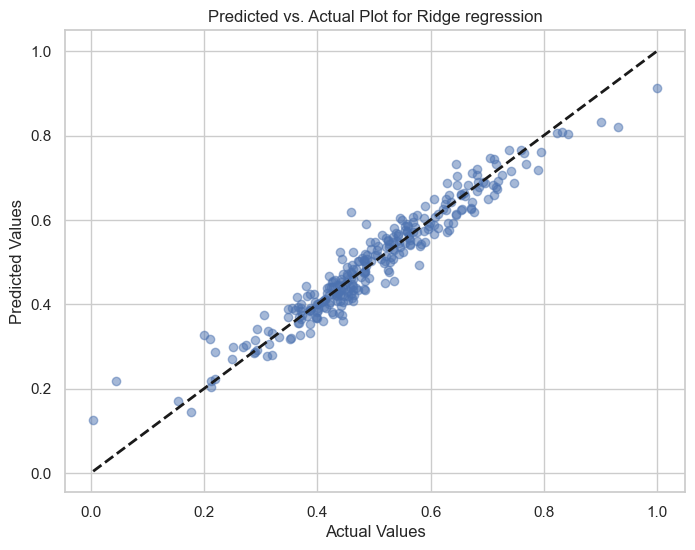

In [60]:
import matplotlib.pyplot as plt

# Plotting Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_predictions_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Plot for Ridge regression')
plt.grid(True)
plt.show()


This is for Ridge regression model, the proximity of the points to the diagonal line indicates that the model's predictions are consistent with the actual values across the range of observations.<br>The close alignment with the diagonal line tells that the model is making accurate predictions.<br>A tight cluster of points around the diagonal line indicates that the model's predictions are reliable and consistent, without significant variability or bias.

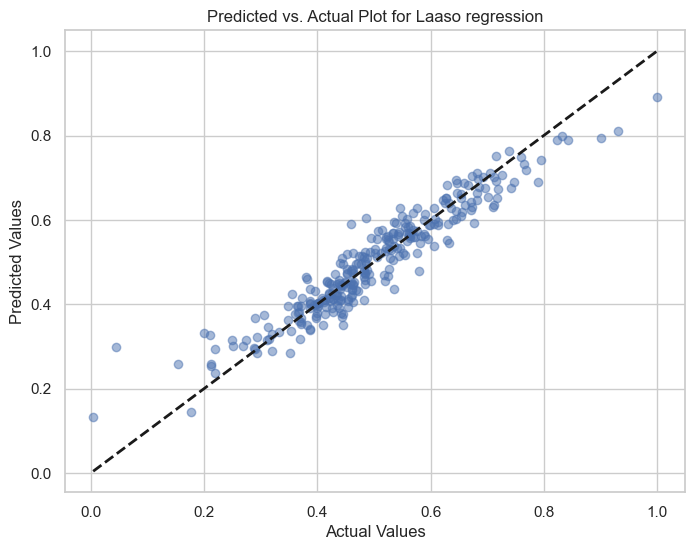

In [61]:
import matplotlib.pyplot as plt

# Plotting Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_predictions_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Plot for Laaso regression')
plt.grid(True)
plt.show()


same for the Lasso regression model as well 

Additionally, let's plot a Residual plot, as it is an essential diagnostic tool in regression analysis for evaluating the goodness of fit and assessing the model's assumptions.

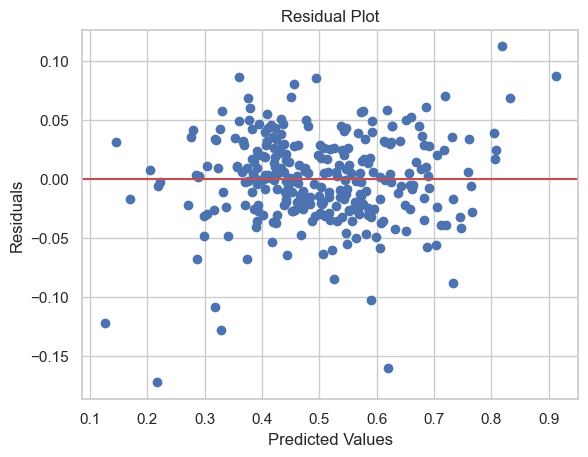

In [62]:
import matplotlib.pyplot as plt

# Calculate residuals for Ridge 
residuals = y_test - ridge_predictions_test

# Plot residuals against predicted values
plt.scatter(ridge_predictions_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Overall, this residual plot suggests that the model is performing well. The randomness and constant variance are positive signs

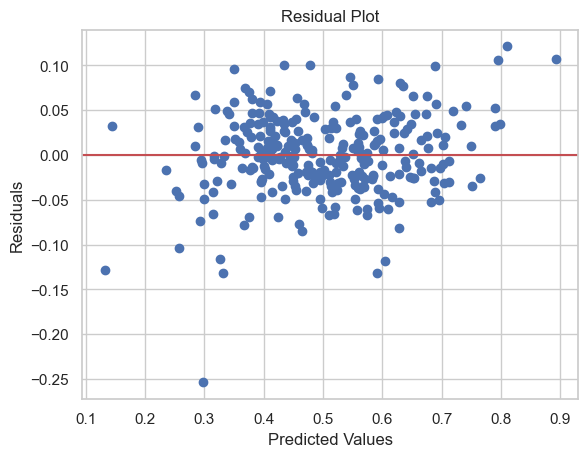

In [63]:
import matplotlib.pyplot as plt

# Calculate residuals for Lasso
residuals = y_test - lasso_predictions_test

# Plot residuals against predicted values
plt.scatter(lasso_predictions_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Finally, great results have been obtained for the lambda determined by Grid Search. As evidenced by low MSE and high R-square values, coupled with correct model analysis, it is evident that model selection performed noticeably well, and exhibited strong performance on the learning responsibilities of the machines